<h1 style="text-align:center;font-size:220%;"><a>BIG DATA DERBY 2022</a></h1> 



**Notebook Run Time: 130sec Thank you for your patient.**

## About Me

**Hello everyone, this may be my first contest where I spend my time seriously. I am a graduate of Mechatronics Engineering. I have been dealing with Data Science for about 1 year. I wish everyone success.**

# Import Libraries


In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode(connected = True)
from plotly.colors import n_colors
colors=['#5a6edc','#fc0da1','#fed400','#E60000','#4a00b5','#abd98c','#FF5733','#800080','#00FFFF','#00FF00']

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
from IPython.display import HTML as html_print
from IPython.display import display

def cstr(s, fcolor='red',bgcolor='#232425'):
    return "<p style=color:{};font-size:21px;background-color:{};>{}</p>".format(fcolor,bgcolor, s)


# Load Data & First Look


In [3]:
race_table=pd.read_csv("/kaggle/input/big-data-derby-2022/nyra_race_table.csv")
start_table_head=["track_id","race_date","race_number","program_number","weight_carried","jockey","odds","position_at_finish"]
start_table=pd.read_csv("/kaggle/input/big-data-derby-2022/nyra_start_table.csv",header=0,names=start_table_head)
tracking_table=pd.read_csv("/kaggle/input/big-data-derby-2022/nyra_tracking_table.csv")
merged_head={"track_id":str,"race_date":str,"race_number":str,"program_number":str,"trakus_index":int,
             "latitude":float,"longitude":float,"distance_id":int, "course_type":str,
             "track_condition":str,"run_up_distance":int,"race_type":str,"post_time":str,"weight_carried":int,
             "jockey":str,"odds":int,"position_at_finish":int}


In [4]:
race_table.head()


track_id   race_date  race_number  distance_id course_type track_condition  \
0      AQU  2019-01-01            1          650           D             MY    
1      AQU  2019-01-01            2          600           D             MY    
2      AQU  2019-01-01            3          550           D             MY    
3      AQU  2019-01-01            4          900           D             MY    
4      AQU  2019-01-01            5          700           D             MY    

   run_up_distance race_type  purse  post_time  
0               36       AOC  80000       1220  
1               48       MCL  41000       1250  
2               54       MCL  35000        121  
3              101       AOC  80000        150  
4               60       ALW  64000        220

In [5]:
start_table.head(15)


track_id   race_date  race_number program_number  weight_carried  \
0       AQU  2019-01-01            1            2               120   
1       AQU  2019-01-01            1            3               118   
2       AQU  2019-01-01            1            4               123   
3       AQU  2019-01-01            1            5               118   
4       AQU  2019-01-01            2            1               121   
5       AQU  2019-01-01            2            2               114   
6       AQU  2019-01-01            2            3               121   
7       AQU  2019-01-01            2            4               123   
8       AQU  2019-01-01            2            5               121   
9       AQU  2019-01-01            2            6               116   
10      AQU  2019-01-01            2            7               121   
11      AQU  2019-01-01            3            1               120   
12      AQU  2019-01-01            3            2               120   
13      AQU  2019-01-01            3            3               113   
14      AQU  2019-01-01            3            4               120   

                     jockey  odds  position_at_finish  
0           Junior Alvarado   295                   3  
1              Jose Lezcano   180                   4  
2              Jomar Garcia  1280                   5  
3             Manuel Franco  1150                   1  
4              Jose Lezcano   220                   2  
5        Benjamin Hernandez   940                   7  
6               Dylan Davis   165                   4  
7              Jomar Garcia  1760                   5  
8   Andre Shivnarine Worrie   800                   3  
9           Reylu Gutierrez   340                   1  
10              Eric Cancel  3975                   6  
11          Junior Alvarado    75                   2  
12              Eric Cancel  5850                   8  
13       Benjamin Hernandez   315                   1  
14            Manuel Franco   980                   3

In [6]:
tracking_table.head(5)

track_id   race_date  race_number program_number  trakus_index   latitude  \
0      AQU  2019-01-01            9            6              72  40.672902   
1      AQU  2019-01-01            9            6              73  40.672946   
2      AQU  2019-01-01            9            6              74  40.672990   
3      AQU  2019-01-01            9            6              63  40.672510   
4      AQU  2019-01-01            9            6              64  40.672553   

   longitude  
0 -73.827607  
1 -73.827587  
2 -73.827568  
3 -73.827781  
4 -73.827762

# Data Replace & Fix

**The hour column has been fixed. The content abbreviations of the track condition and course type columns have been fixed.**

In [7]:
race_table['post_time']=race_table['post_time'].astype(str).apply(lambda x: str(x[0])+str(x[1])+':'+str(x[2])+str(x[3]) if len(str(x))!=3 else str(0)+str(x[0])+':'+str(x[1])+str(x[2]))
race_table['track_condition']=race_table['track_condition'].astype(str).apply(lambda x: str(x[:-1]))
track_condition_head={'YL':'Yielding', 'FM':'Firm', 'SY':'Sloppy', 'GD':'Good', 'FT':'Fast', 'MY':'Muddy', 'SF':'Soft'}
course_type_head={'M':'Hurdle', 'D':'Dirt', 'O':'Outer turf', 'I':'Inner turf', 'T':'turf'}
race_table['track_condition'].replace(track_condition_head,inplace=True)
race_table['course_type'].replace(course_type_head,inplace=True)
race_table.head(5)


track_id   race_date  race_number  distance_id course_type track_condition  \
0      AQU  2019-01-01            1          650        Dirt           Muddy   
1      AQU  2019-01-01            2          600        Dirt           Muddy   
2      AQU  2019-01-01            3          550        Dirt           Muddy   
3      AQU  2019-01-01            4          900        Dirt           Muddy   
4      AQU  2019-01-01            5          700        Dirt           Muddy   

   run_up_distance race_type  purse post_time  
0               36       AOC  80000     12:20  
1               48       MCL  41000     12:50  
2               54       MCL  35000     01:21  
3              101       AOC  80000     01:50  
4               60       ALW  64000     02:20

In [8]:
merged_df=start_table.merge(tracking_table,on=['track_id','race_date','race_number','program_number'],how='inner')\
                             .merge(race_table,on=['track_id','race_date','race_number'],how='inner')

merged_df['race_date']=pd.to_datetime(merged_df['race_date'],format='%Y-%m-%d')
start_table['race_date']=pd.to_datetime(start_table['race_date'],format='%Y-%m-%d')
race_table['race_date']=pd.to_datetime(race_table['race_date'],format='%Y-%m-%d')
merged_df.head(5)

track_id  race_date  race_number program_number  weight_carried  \
0      AQU 2019-01-01            1            2               120   
1      AQU 2019-01-01            1            2               120   
2      AQU 2019-01-01            1            2               120   
3      AQU 2019-01-01            1            2               120   
4      AQU 2019-01-01            1            2               120   

            jockey  odds  position_at_finish  trakus_index   latitude  \
0  Junior Alvarado   295                   3            11  40.669540   
1  Junior Alvarado   295                   3            12  40.669568   
2  Junior Alvarado   295                   3            13  40.669595   
3  Junior Alvarado   295                   3            14  40.669623   
4  Junior Alvarado   295                   3            15  40.669653   

   longitude  distance_id course_type track_condition  run_up_distance  \
0 -73.829121          650        Dirt           Muddy               36   
1 -73.829109          650        Dirt           Muddy               36   
2 -73.829098          650        Dirt           Muddy               36   
3 -73.829086          650        Dirt           Muddy               36   
4 -73.829073          650        Dirt           Muddy               36   

  race_type  purse post_time  
0       AOC  80000     12:20  
1       AOC  80000     12:20  
2       AOC  80000     12:20  
3       AOC  80000     12:20  
4       AOC  80000     12:20

<h1 style="text-align:left;font-size:200%;"><a id='DFuture' > Dedection Future Types </a></h1> 


**I had to separate Future Types for both an overview and use in other functions.**

In [9]:
def dedect_features(df,nc_th=15,cn_th=20,title='Features Type Summary'):
    '''
    Parameters
    ----------
    df : DataFrame
        Main Df
    nc_th : Integer, 
        Numeric but categorical threshold limit. The default is 15.
    cn_th : Integer, 
        Categorical but numeric threshold limit. The default is 20.

    Returns
    -------
    date_cols : List
        Date Types Columns List.
    num_but_cat : List
        Numeric but Categorical Types Columns List.
    cat_col : List
        Categorical Types Columns List.
    cat_but_num : List
        Categorical but Numeric Columns List.
    num_col : List
        Date Types Columns List.

    '''
    date_cols=[col for col in df if df[col].dtypes=="datetime64[ns]"]
    
    num_but_cat=[col for col in df.select_dtypes(['float','integer']).columns if df[col].value_counts().shape[0]<nc_th]
    cat_col=df.select_dtypes(['object','category']).columns.to_list()+num_but_cat
    cat_but_num=[col for col in df.select_dtypes(['object','category']).columns if df[col].value_counts().shape[0]>cn_th]
    cat_col=[col for col in cat_col if col not in cat_but_num]
    
    num_col=df.select_dtypes(['integer','float']).columns.to_list()
    num_col=[col for col in num_col if col not in num_but_cat]
    
    fig0=go.Figure()
    fig0.add_trace(go.Scatter(
        x=[0.2,1.7,3.4,5.3],
        y=[1.7, 1.7, 1.7, 1.7],
        mode="text",
        text=["Date Cols","Cardinal Cols","Categorical Cols","Numeric Columns", "Numeric but Cat. Columns"],
        textposition="bottom center"
        ))
    
    fig0.add_trace(go.Scatter(
    x=[0.2,1.7,3.4,5.3],
    y=[1.1, 1.1, 1.1, 1.1],
    mode="text", 
    text=["<span style='font-size:24px'><b>"+ str(len(date_cols)) +"</b></span>", 
          "<span style='font-size:24px'><b>"+ str(len(cat_but_num)) +"</b></span>",
          "<span style='font-size:24px'><b>"+ str(len(cat_col)) + "</b></span>",
          "<span style='font-size:24px'><b>"+ str(len(num_col)) + "</b></span>",
          "<span style='font-size:24px'><b>"+ str(len(num_but_cat)) + "</b></span>",
          "<span style='font-size:24px'><b>17</b></span>"],
    textposition="bottom center"
        ))
    fig0.add_hline(y=2.2, line_width=5, line_color='orange')
    fig0.add_hline(y=0.3, line_width=3, line_color='orange')
    fig0.add_trace(go.Scatter(
        x=[3.2],
        y=[-0.2],
        mode="text",
        text=["<span style='font-size:18px'><b>Total Columns: "+str(df.shape[1])+"</b></span>"],
        textposition="bottom center"
        ))
    fig0.update_yaxes(visible=False)
    fig0.update_xaxes(visible=False)
    fig0.update_layout(showlegend=False, height=300, width=900, 
                  title=title, title_x=0.5, title_y=0.9,
                  xaxis_range=[-0.5,6.6], yaxis_range=[-1.2,2.2],
                  plot_bgcolor='#424242', paper_bgcolor='#424242',
                  font=dict(size=20, color='#fff0f5'),
                  title_font=dict(size=28, color='#F5F5DC'),
                  margin=dict(t=90,l=30,b=0,r=30), 
    )
    fig0.show()
    
    return date_cols,num_but_cat,cat_col,cat_but_num,num_col
dfs_features_type={'race_table':[],'start_table':[],'tracking_table':[],'merged_df':[]}

date_cols,num_but_cat,cat_col,cat_but_num,num_col=dedect_features(race_table,title='Race Table Features Type Summary')
dfs_features_type['race_table']={'date_col':date_cols,'num_but_cat':num_but_cat,'cardinal':cat_but_num,'cat_col':cat_col,'numeric':num_col}

date_cols,num_but_cat,cat_col,cat_but_num,num_col=dedect_features(start_table,title='Start Table Features Type Summary')
dfs_features_type['start_table']={'date_col':date_cols,'num_but_cat':num_but_cat,'cardinal':cat_but_num,'cat_col':cat_col,'numeric':num_col}

date_cols,num_but_cat,cat_col,cat_but_num,num_col=dedect_features(tracking_table,title='Tracking Table Features Type Summary')
dfs_features_type['tracking_table']={'date_col':date_cols,'num_but_cat':num_but_cat,'cardinal':cat_but_num,'cat_col':cat_col,'numeric':num_col}

date_cols,num_but_cat,cat_col,cat_but_num,num_col=dedect_features(merged_df,title='Merged All Tables Features Type Summary')
dfs_features_type['merged_df']={'date_col':date_cols,'num_but_cat':num_but_cat,'cardinal':cat_but_num,'cat_col':cat_col,'numeric':num_col}

# EDA ( Explotory Data Analysis )


***The first thing I can say for EDA is that the Finish line must have clear coordinates. If we had this valuable data, new features such as the effect of the ground condition on the horses and the creation of a ground coefficient could be created. I conducted an in-depth analysis in detail. You can read my findings from time to time.***

***I took a general-to-specific approach as a flow. As you scroll down, you will encounter more in-depth reviews.***

In [10]:
start_race=start_table.merge(race_table,on=['track_id','race_date','race_number'],how='inner')
def first_and_last(start_race):
    col=['track_id','race_date','race_number','jockey','position_at_finish']
    
    first_placement=start_race[start_race['position_at_finish']==min(start_race['position_at_finish'])][['track_id','race_date','race_number','track_condition','course_type' ,'jockey']]
    #win_index=start_race[start_race['position_at_finish']==min(start_race['position_at_finish'])].index
    #start_race.loc[win_index,'winner']=int(1)
    #start_race.fillna(0,inplace=True)
    
    last_placement=start_race[~(start_race['position_at_finish']==min(start_race['position_at_finish']))][['track_id','race_date','race_number','track_condition','course_type' ,'jockey']]
    j=start_race[col]              
    #last_placement=start_race.groupby(['race_date','race_number'],as_index=False)['position_at_finish'].max()
    #last_placement=last_placement.merge(start_race,on=['race_date','race_number','position_at_finish'],how='inner')
    count_first_placement=first_placement[['track_id','track_condition','course_type','jockey']].value_counts().sort_index(level=['track_id'],ascending=True).sort_values(ascending=False)
    count_first_placement=count_first_placement.reset_index(name='win_counts')
    count_last_placement=last_placement[['track_id','track_condition','course_type','jockey']].value_counts().sort_index(level=['track_id'],ascending=True).sort_values(ascending=False)
    count_last_placement=count_last_placement.reset_index(name='lose_counts')
    return start_race,first_placement,last_placement,count_first_placement,count_last_placement
start_race,first_placement,last_placement,count_first_placement,count_last_placement=first_and_last(start_race)

**In general, it has been observed that the races are spread over 2 location.**

In [11]:
track_idcount=race_table['track_id'].value_counts()
fig=px.bar(x=track_idcount.index,y=track_idcount,color=track_idcount.index,text_auto=True)
fig.update_layout(title_text='<b>'+'Race Count For Per Track Id '+'</b>',
                                      title_x=0.5,
                                      xaxis_title="Track Name", 
                                      yaxis_title="Race Count",
                                      paper_bgcolor='#232425',
                                      plot_bgcolor='#232425',
                                      font_color="white",
                                      title_font_color="#00FFFF",
                                      legend_title_font_color="white",
                                      font=dict(
                                          family="Courier New, monospace",
                                          size=18
                                          ),
                                         )
fig.show()

### ***Number of races by date.***

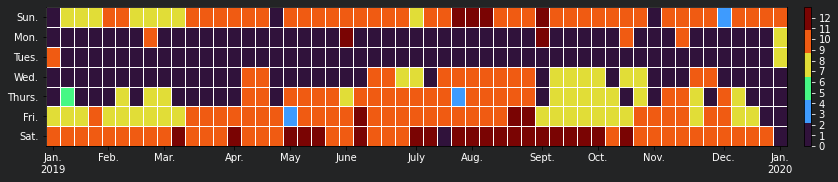

In [12]:
#Source: https://www.kaggle.com/code/alejopaullier/big-data-derby-2022-eda?scriptVersionId=103214099&cellId=21

DAYS = ['Sun.', 'Mon.', 'Tues.', 'Wed.', 'Thurs.', 'Fri.', 'Sat.']
MONTHS = ['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'June', 'July', 'Aug.', 'Sept.', 'Oct.', 'Nov.', 'Dec.']


def date_heatmap(series, start=None, end=None, mean=False, ax=None, **kwargs):
    '''Plot a calendar heatmap given a datetime series.

    Arguments:
        series (pd.Series):
            A series of numeric values with a datetime index. Values occurring
            on the same day are combined by sum.
        start (Any):
            The first day to be considered in the plot. The value can be
            anything accepted by :func:`pandas.to_datetime`. The default is the
            earliest date in the data.
        end (Any):
            The last day to be considered in the plot. The value can be
            anything accepted by :func:`pandas.to_datetime`. The default is the
            latest date in the data.
        mean (bool):
            Combine values occurring on the same day by mean instead of sum.
        ax (matplotlib.Axes or None):
            The axes on which to draw the heatmap. The default is the current
            axes in the :module:`~matplotlib.pyplot` API.
        **kwargs:
            Forwarded to :meth:`~matplotlib.Axes.pcolormesh` for drawing the
            heatmap.

    Returns:
        matplotlib.collections.Axes:
            The axes on which the heatmap was drawn. This is set as the current
            axes in the `~matplotlib.pyplot` API.
    '''
    # Combine values occurring on the same day.
    dates = series.index.floor('D')
    group = series.groupby(dates)
    series = group.mean() if mean else group.sum()

    # Parse start/end, defaulting to the min/max of the index.
    start = pd.to_datetime(start or series.index.min())
    end = pd.to_datetime(end or series.index.max())

    # We use [start, end) as a half-open interval below.
    end += np.timedelta64(1, 'D')

    # Get the previous/following Sunday to start/end.
    # Pandas and numpy day-of-week conventions are Monday=0 and Sunday=6.
    start_sun = start - np.timedelta64((start.dayofweek + 1) % 7, 'D')
    end_sun = end + np.timedelta64(7 - end.dayofweek - 1, 'D')

    # Create the heatmap and track ticks.
    num_weeks = (end_sun - start_sun).days // 7
    heatmap = np.zeros((7, num_weeks))
    ticks = {}  # week number -> month name
    for week in range(num_weeks):
        for day in range(7):
            date = start_sun + np.timedelta64(7 * week + day, 'D')
            if date.day == 1:
                ticks[week] = MONTHS[date.month - 1]
            if date.dayofyear == 1:
                ticks[week] += f'\n{date.year}'
            if start <= date < end:
                heatmap[day, week] = series.get(date, 0)

    # Get the coordinates, offset by 0.5 to align the ticks.
    y = np.arange(8) - 0.5
    x = np.arange(num_weeks + 1) - 0.5

    # Plot the heatmap. Prefer pcolormesh over imshow so that the figure can be
    # vectorized when saved to a compatible format. We must invert the axis for
    # pcolormesh, but not for imshow, so that it reads top-bottom, left-right.
    ax = ax or plt.gca()
    mesh = ax.pcolormesh(x, y, heatmap, **kwargs)
    ax.invert_yaxis()

    # Set the ticks.
    ax.set_xticks(list(ticks.keys()))
    ax.set_xticklabels(list(ticks.values()))
    plt.setp(ax.get_xticklabels(), color="white")
    ax.set_yticks(np.arange(7))
    ax.set_yticklabels(DAYS)
    plt.setp(ax.get_yticklabels(), color="white")
    plt.setp(ax.get_yticklabels(), color="white")

    # Set the current image and axes in the pyplot API.
    plt.sca(ax)
    plt.sci(mesh)

    return ax


# # Get some data, a series of values with datetime index.
# data = np.random.randint(5, size=365)
# data = pd.Series(data)
# data.index = pd.date_range(start='2017-01-01', end='2017-12-31', freq='1D')

race_table["race_date"] =  pd.to_datetime(race_table["race_date"], format='%Y-%m-%d')
data = race_table["race_date"].value_counts()

# Create the figure. For the aspect ratio, one year is 7 days by 53 weeks.
# We widen it further to account for the tick labels and color bar.
figsize = plt.figaspect(8 / 50)
fig = plt.figure(figsize=(figsize),facecolor='#232425')

# Plot the heatmap with a color bar.
ax = date_heatmap(data, edgecolor='white')
cb=plt.colorbar(ticks=range(max(data.values)), pad=0.02)
cb.ax.yaxis.set_tick_params(color='white')
cmap = plt.cm.get_cmap('turbo', 6)
plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color='white')
plt.set_cmap(cmap)
# Force the cells to be square. If this is set, the size of the color bar
# may look weird compared to the size of the heatmap. That can be corrected
# by the aspect ratio of the figure or scale of the color bar.
ax.set_aspect('auto')

***Let's dig a little deeper. Race distributions according to Track condition / Course Type on the tracks are as in the figure. Most of the races are Course Type Dirt for all tracks.***

In [13]:
track_idcount=race_table[['track_id','course_type','track_condition']].value_counts().sort_index(level=0)
types_condition=race_table.groupby(['track_id','course_type','track_condition'],as_index=False)['race_number'].count()
fig=px.bar(types_condition,x='track_condition',y='race_number',facet_col='course_type',color='track_id',barmode='group')
fig.update_layout(title_text='<b>'+'Course Type / Track Condition Race Count On Track Id '+'</b>',
                                      title_x=0.5,
                                      paper_bgcolor='#232425',
                                      plot_bgcolor='#232425',
                                      font_color="white",
                                      title_font_color="#00FFFF",
                                      legend_title_font_color="white",
                                      font=dict(
                                          family="Courier New, monospace",
                                          size=18
                                          ),
                                         )
fig.for_each_annotation(lambda a: a.update(text=a['text'].split('=')[1]))
fig.show()

***Let's take a look at how many races jockeys run. Here, we can say that the jockeys who competed over 100 races statistically obtained a general statistics. As the number of races is low, the race they win has a great effect on the win rate. ***

In [14]:
jockey_racecount=start_race['jockey'].value_counts()
fig=px.bar(x=jockey_racecount.index,y=jockey_racecount)
fig.update_layout(title_text='<b>'+'Race Count For Per Jockey'+'</b>',
                                      title_x=0.5,
                                      height=800,
                                      xaxis_title="Jockey Name", 
                                      yaxis_title="Race Count",
                                      paper_bgcolor='#232425',
                                      plot_bgcolor='#232425',
                                      font_color="white",
                                      title_font_color="#00FFFF",
                                      legend_title_font_color="white",
                                      font=dict(
                                          family="Courier New, monospace",
                                          size=18
                                          ),
                                         )
fig.show()

In [15]:
def jockey_stat(count_first_placement,count_last_placement,j_name,th):
    first_j_name_stat=count_first_placement[count_first_placement['jockey']==j_name]
    last_j_name_stat=count_last_placement[count_last_placement['jockey']==j_name]
    
    if (int(first_j_name_stat['win_counts'].sum())+int(last_j_name_stat['lose_counts'].sum()))<th:
        return print('Not enough race count <'+str(th)+' for ---> '+j_name + '\n'  )
    else:
        fig=px.bar(first_j_name_stat,x='track_condition',y='win_counts',facet_col='course_type',color='track_id',barmode='group',text='win_counts')
        fig.update_traces(textposition='outside', textfont_size=11,textangle=90)
        fig.update_yaxes(showgrid=True, gridwidth=0.75, gridcolor='LightPink')
        
        fig1=px.bar(last_j_name_stat,x='track_condition',y='lose_counts',facet_col='course_type',color='track_id',barmode='group',text='lose_counts')
        fig1.update_traces(textposition='outside', textfont_size=13,textangle=90)
        fig1.update_yaxes(showgrid=True, gridwidth=0.75, gridcolor='LightPink')
        
        fig.update_layout(title_text='<b>'+j_name+' Winner Stats '+'</b>',
                                      title_x=0.5,
                                      paper_bgcolor='#232425',
                                      plot_bgcolor='#232425',
                                      font_color="white",
                                        width=800,
                                      title_font_color="#00FFFF",
                                      legend_title_font_color="white",
                                      font=dict(
                                          family="Courier New, monospace",
                                          size=18
                                          ),
                                         )
        fig1.update_layout(title_text='<b>'+j_name+' Loser Stats '+'</b>',
                                      title_x=0.5,
                                      paper_bgcolor='#232425',
                                       width=800,
                                      plot_bgcolor='#232425',
                                      font_color="white",
                                      title_font_color="#D70040",
                                      legend_title_font_color="white",
                                      font=dict(
                                          family="Courier New, monospace",
                                          size=18),
                                         )
        fig.for_each_annotation(lambda a: a.update(text=a['text'].split('=')[1]))
        fig.show()
        
        fig1.for_each_annotation(lambda a: a.update(text=a['text'].split('=')[1]))
        fig1.show()
        print('\n')

***And a little deeper..
We talked about the win rate. Let's take a look at the winrates of each jockey according to the Course Type / Track condition. Here, circle size represents the total number of races attended. We can see that there is no data in some types. When we look in general, we can see that Manuel Franco raced with a winrate of 0.227 in 317 races, for example, in Dirt type and Fast track condition on the Aquduct track. And we can say that it is in the leading position as winrate in Sloppy / Dirt.***

***Individual names can be selected from the Jockey Name list.***

In [16]:
start_race,first_placement,last_placement,count_first_placement,count_last_placement=first_and_last(start_race)
wfirst_placement=count_first_placement.sort_values(['track_id','course_type']).set_index(['track_id','course_type','track_condition','jockey'])
wlast_placement=count_last_placement.sort_values(['track_id','course_type']).set_index(['track_id','course_type','track_condition','jockey'])
for index in wlast_placement.index:
    try:
        wlast_placement.loc[index,'win_rate']=wfirst_placement.loc[index]['win_counts']/(wfirst_placement.loc[index]['win_counts']+wlast_placement.loc[index]['lose_counts'])
        wlast_placement.loc[index,'race_count']=wfirst_placement.loc[index]['win_counts']+wlast_placement.loc[index]['lose_counts']
    except KeyError:
        try:
            wlast_placement.loc[index]['lose_counts']
            wlast_placement.loc[index,'win_rate']=0
        except KeyError:
            wlast_placement.loc[index,'win_rate']=1
        
wlast_placement.fillna(0,inplace=True)
wlast_placement.reset_index(inplace=True)

above_150=wlast_placement[wlast_placement['race_count']>30]

fig=px.scatter(above_150,y='win_rate',x='track_id',color='jockey',facet_col='track_condition',facet_row='course_type',size='race_count')
fig.update_layout(title_text='<b>'+' Win Rate Charts for Track Condition / Course Type Per Jockey '+'</b>',
                                  title_font=dict(color='#AD2B10'),
                                  height=1000,
                                  width=1000,
                                  title_x=0.5,
                                  showlegend=False,
                                  
                                  paper_bgcolor='#232425',
                                  plot_bgcolor='#232425',
                                  font=dict(
                                      family="Courier New, monospace",
                                      size=18,
                                      color='white'),
                                  
                  updatemenus=[
                                {
                                    "buttons": [
                                        {
                                            "label": m,
                                            "method": "update",
                                            "args": [
                                                {
                                                    "visible": [
                                                        True if m == "All" else t.name == m for t in fig.data
                                                    ]
                                                }
                                                
                                            ],
                                            
                                        }
                                        for m in ["All"] + above_150["jockey"].unique().tolist()
                                    ],
                                    'font' : dict(color='LightPink'),
                                    'pad':{"l": 0, "r": 20, "t":25 , "b": 0}
                                }
                            ],
                  
                  
                                     )


fig['data'][0]
fig['layout']
fig.update_yaxes(showgrid=True,gridwidth=0.75, gridcolor='LightPink')
fig.update_xaxes(showgrid=False)
fig.for_each_annotation(lambda a: a.update(text=a['text'].split('=')[1]))
fig.add_annotation(dict(text='Select Jockey Name: ', x=-0.46, y=1.005, xref='paper',yref='paper', align='left', showarrow=False,font=dict(size=18)))
fig.update_xaxes(showticklabels=True)
fig.show()


***Here, we have discussed the winning stats and losing stats of the horses competing the most, which can be examined in more detail here. The number of races was taken as 350 and above. You can see in the output that jockeys with less than 350 races are not plotted.***

In [17]:
for j in count_first_placement['jockey'].unique():
    jockey_stat(count_first_placement,count_last_placement,j,350)



Not enough race count <350 for ---> Ricardo Santana Jr.





Not enough race count <350 for ---> Hector Rafael Diaz Jr.





Not enough race count <350 for ---> Samuel Camacho Jr.

Not enough race count <350 for ---> Andre Shivnarine Worrie

Not enough race count <350 for ---> Declan Carroll

Not enough race count <350 for ---> Tyler Gaffalione

Not enough race count <350 for ---> Michael J. Luzzi

Not enough race count <350 for ---> Luis A. Rodriguez Castro

Not enough race count <350 for ---> Heman K. Harkie

Not enough race count <350 for ---> Harry Hernandez

Not enough race count <350 for ---> Julio Correa

Not enough race count <350 for ---> Carlos J. Hernandez

Not enough race count <350 for ---> Joe Bravo

Not enough race count <350 for ---> Flavien Prat

Not enough race count <350 for ---> Pablo Fragoso

Not enough race count <350 for ---> Julian Pimentel

Not enough race count <350 for ---> Jorge A. Vargas Jr.

Not enough race count <350 for ---> Silvestre Gonzalez

Not enough race count <350 for ---> Chris Landeros

Not enough race count <350 for ---> Mike E. Smith

Not enough race count <350 fo

In [18]:
def select_race(df,race_date,track_id,race_number):  
    '''
    Filters the desired race from the merged DataFrame. Returns the filtered DataFrame and Jockey coordinates.

    Parameters
    ----------
    df : TYPE DataFrame.
        Merged Dataframe.
    race_date : TYPE String.
    track_id : TYPE String.
    race_number : TYPE Int.
        
    Returns
    -------
    first : TYPE DataFrame
    jockey_cordinants : TYPE Dict
      
    '''
    first=merged_df[(merged_df['race_date']==race_date) & (merged_df['track_id']==track_id) & (merged_df['race_number']==race_number)]
    a=first['jockey'].value_counts()
    jockey_cordinants=[]

    first.set_index('trakus_index',drop=True,inplace=True)
    first=first.sort_index()
    first.reset_index(drop=True,inplace=True)
    for i in a.index:
        jockey_cordinants.append(first[first['jockey']==i][['latitude','longitude']].reset_index(drop=True))

    first.head()
    return first,jockey_cordinants


***Let's see how a race is played as a simulation.***

In [19]:
first,jockey_cordinants=select_race(merged_df,'2019-01-04','AQU',4)
def sim_chart(jockey_cordinants,df):
    j_0_y=jockey_cordinants[0]['longitude']
    j_0_x=jockey_cordinants[0]['latitude']
    
    a=first['jockey'].value_counts()
    
    j_0_y_min=np.min(j_0_y)-0.00050
    j_0_y_max=np.max(j_0_y)+0.00050
    j_0_x_min=np.min(j_0_x)-0.00020
    j_0_x_max=np.max(j_0_x)+0.00020
    
    fig = go.Figure(
    data=[
        go.Scatter(x=jockey_cordinants[i]['latitude'],y=jockey_cordinants[i]['longitude'],
                     mode="lines",
                     name=a.index[i],
                     line=dict(width=0.1, color=colors[i])) for i in range(len(jockey_cordinants))]+[go.Scatter(x=df[df['jockey']==df[df['latitude']==min(df['latitude'])]['jockey'].iloc[0]]['latitude'],
                         y=df[df['jockey']==df[df['latitude']==min(df['latitude'])]['jockey'].iloc[0]]['longitude'],
                         mode="lines",
                         name='Track',
                         line=dict(width=1.4, color="black"))],
    
    layout=go.Layout(
        xaxis=dict(range=[j_0_x_max, j_0_x_min], autorange=False, zeroline=False),
        yaxis=dict(range=[j_0_y_min, j_0_y_max], autorange=False, zeroline=False),
        title_text="Race type : {} - Track : {} - Race Date : {} - Distance : {} - Course : {}".format(df['race_type'][0],
                                    df['track_id'][0],df['race_date'][0],df['distance_id'][0],df['course_type'][0]), hovermode="closest",
        updatemenus=[dict(type="buttons",
                          buttons=[dict(label="Play",
                                        method="animate",
                                        args=[None,{"frame": {"duration": 10,},
                                                   }])

                                  ])],

        ),
    frames=[
        go.Frame(
            data=[
                go.Scatter(
                    x=[jockey_cordinants[i]['latitude'][k]],
                    y=[jockey_cordinants[i]['longitude'][k]],
                    mode="markers",
                    marker=dict(size=7,color=colors[i])) for i in range(len(jockey_cordinants))],
               )

        for k in range(int(jockey_cordinants[0].index.max()))]

    )

    fig.show()
%time sim_chart(jockey_cordinants,first)

CPU times: user 2.41 s, sys: 11.7 ms, total: 2.42 s
Wall time: 2.43 s


In [20]:
first,jockey_cordinants=select_race(merged_df,'2019-01-04','AQU',1)
%time sim_chart(jockey_cordinants,first)

CPU times: user 1.93 s, sys: 27.4 ms, total: 1.96 s
Wall time: 1.96 s


# Jockey Ranking in Furlongs


In [21]:
def cordinants_per_furlong(df,jockey_cordinants):
    '''
    Parameters
    ----------
    df : Selected race dataframe returning from select_race function
    jockey_cordinants : TYPE
        DESCRIPTION.

    Returns
    -------
    position_cordinants_per_furlong : TYPE dict.
        Coordinates of jockeys at furlong points.

    furlongs_split : TYPE List.
        Furlong name list.

    per_furlong_pos_index : TYPE List.
        Furlong position indexes.

    '''
    #furlongs_interval list
    furlong=int((first['distance_id'].value_counts().index/100)[0])+1
    furlongs_split=[i for i in range(1,furlong+1)]
    furlongs_split.insert(0,'Start')
    if furlong % round(furlong,0)!=0:
        furlongs_split.insert(len(furlongs_split),'Finish')
    else:
        furlongs_split.insert(-1,'Finish')
        furlongs_split.pop(-1)
    fur=first['distance_id'][0]/100 #How many furlongs 
    fur_meters=201.1684 # furlong meters
    
    pist_size=fur_meters*(fur) # pist long length
    index_size=jockey_cordinants[0].shape[0] # trakus index length
    per_furlong=pist_size/index_size # Calculating how many meters data is received
    
    per_index_one_furlongs=int(np.round(fur_meters/per_furlong,0)) #Furlong is reached in which index
    
    #Furlong index list
    per_furlong_pos_index=[i*per_index_one_furlongs for i in range(int(fur)+1)]
    per_furlong_pos_index.insert(len(per_furlong_pos_index),per_furlong_pos_index[-1]+(index_size-per_furlong_pos_index[-1]-1))
    per_furlong_pos_index.pop(-2)
    position_cordinants_per_furlong={str(i): [] for i in df.jockey.value_counts().index}
    
    
    for num,val in enumerate(position_cordinants_per_furlong.keys()):
        l=[]
        for n,i in enumerate(per_furlong_pos_index):
            if int(jockey_cordinants[num].index[-1])!=per_furlong_pos_index[-1]:
                miss=[i for i in per_furlong_pos_index if i>int(jockey_cordinants[num].index[-1])]
                a=pd.concat([pd.DataFrame([np.nan], columns=['latitude'],index=[i]) for i in range(int(jockey_cordinants[num].index[-1])+1,miss[-1]+1)])
                b=pd.concat([pd.DataFrame([np.nan], columns=['longitude'],index=[i]) for i in range(int(jockey_cordinants[num].index[-1])+1,miss[-1]+1)])
                ab=pd.concat([a,b],axis=1)
                jockey_cordinants[num]=pd.concat([jockey_cordinants[num],ab],axis=0)
                jockey_cordinants[num].fillna(method='ffill',inplace=True)
            l.append(jockey_cordinants[num].loc[i])   
        position_cordinants_per_furlong[val]=l
        
    return position_cordinants_per_furlong,furlongs_split,per_furlong_pos_index

def get_origin(df):
    '''
    Parameters
    ----------
    df : TYPE DataFrame.
       Selected race dataframe returning from select_race function.

    Returns
    -------
    xmax_y : TYPE float.
       Y coordinate corresponding to the max value of the X coordinate of the runway..
    xmin_y : TYPE float.
        Y coordinate corresponding to the min value of the X coordinate of the runway..
    origin_x : TYPE float.
        X coordinate of the center point of the runway.
    origin_y : TYPE float.
        Y coordinate of the center point of the runway.

    '''
    pist_cord=first[first['jockey']==first[first['latitude']==min(first['latitude'])]['jockey'].iloc[0]]
    x_max=pist_cord['latitude'].max()
    x_min=pist_cord['latitude'].min()
    y_max=pist_cord['longitude'].max()
    y_min=pist_cord['longitude'].min()
    origin_x= (x_max+x_min)/2
    xmax_y=pist_cord[pist_cord['latitude']==x_max]['longitude'].iloc[0]
    xmin_y=pist_cord[pist_cord['latitude']==x_min]['longitude'].iloc[0]
    origin_y=(y_max+y_min)/2
    return xmax_y,xmin_y,origin_x,origin_y

def checkpoints_location(df,jockey_cordinants,per_furlong_pos_index,type=0):
    '''
    Parameters
    ----------
    df : TYPE DataFrame.
       Selected race dataframe returning from select_race function.
    jockey_cordinants : TYPE Dict.
        Selected race  jockey coordinates ,dictionary returning from select_race function.
    per_furlong_pos_index : TYPE List.
        Furlong's index returning from cordinants_per_furlong functions.
    type : TYPE Int, optional
        No graphics. The default is 0.

    Returns
    -------
    checkpoints_cordinant : TYPE
        DESCRIPTION.

    '''
    checkpoints_cordinant={str(i): [] for i in first.jockey.value_counts().index}
    for n,i in enumerate(checkpoints_cordinant.keys()):
        checkpoints_cordinant[i]=jockey_cordinants[n].loc[per_furlong_pos_index]
    #checkpoints_cordinant=rework(checkpoints_cordinant)
    colors=['#5a6edc','#fc0da1','#fed400','#E60000','#4a00b5','#abd98c','#FF5733','#800080','#00FFFF','#00FF00']
    if type!=1:
        fig = go.Figure(
            data=[
                go.Scatter(x=df[df['jockey']==df[df['latitude']==min(df['latitude'])]['jockey'].iloc[0]]['latitude'],
                             y=df[df['jockey']==df[df['latitude']==min(df['latitude'])]['jockey'].iloc[0]]['longitude'],
                             mode="lines",
                             name='Track',
                             line=dict(width=1.4, color="white"))])
        for num,val in enumerate(checkpoints_cordinant.keys()):
            fig.add_trace(go.Scatter(x=checkpoints_cordinant[val]['latitude'],
                                     y=checkpoints_cordinant[val]['longitude'],
                                    mode="markers",
                                    name=val,
                                    marker=dict(size=7,color=colors[num])))
        fig.add_trace(go.Scatter(x=[origin_x],
                                    y=[origin_y],
                                    mode="markers",
                                    name="Origin",
                                    marker=dict(size=7,color='pink')))
        fig.update_layout(title_text='<b>'+str(len(per_furlong_pos_index)-1)+' Furlong Checkpoint Jockey Position '+'</b>',
                                  title_x=0.5,
                                  paper_bgcolor='#232425',
                                  plot_bgcolor='#232425',
                                  font=dict(
                                      family="Courier New, monospace",
                                      size=18,
                                      color='white'),
                                     )
        fig.add_annotation(dict(font=dict(color='yellow',size=15),
                                        x=-0.085,
                                        y=1.15,
                                        showarrow=False,
                                        text='Track: '+first['track_id'][0]+' | '+'Race Date: '+str(first['race_date'][0].date())+' | '+'Race Number:'+str(first['race_number'][0]),
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))
        fig.update_xaxes(showgrid=False, gridwidth=0.75, gridcolor='LightPink')
        fig.update_yaxes(showgrid=False, gridwidth=0.75, gridcolor='LightPink')
        fig.show()
    return checkpoints_cordinant
    

In [22]:
xmax_y,xmin_y,origin_x,origin_y=get_origin(first)
position_cordinants_per_furlong,furlongs_split,per_furlong_pos_index=cordinants_per_furlong(first,jockey_cordinants)
checkpoints_cordinant=checkpoints_location(first,jockey_cordinants,per_furlong_pos_index)

In [23]:
first,jockey_cordinants=select_race(merged_df,'2019-01-01','AQU',1)
position_cordinants_per_furlong,furlongs_split,per_furlong_pos_index=cordinants_per_furlong(first,jockey_cordinants)
xmax_y,xmin_y,origin_x,origin_y=get_origin(first)
checkpoints_cordinant=checkpoints_location(first,jockey_cordinants,per_furlong_pos_index)

# How the Calculate Furlong Positions ? 

* ***To find the order of the jockeys in the furlongs, I got each of the coordinate values ​​with a function that calculates the stance angles relative to each other.I would like to give a brief information about it.***

* ***First, a function calculates the angle for each jockey relative to the other jockeys. Each jockey has his own coordinate system. I divided this coordinate system into 2 parts angularly. (270,0] & [0,90] Area-2 , (90,180] & [180,270] Area-1 is as in the figure. What happens in Area-2 is the competitors who stay in front of the Jockey. Area-1 is the competitors who stay behind. it adds up the angles of a jockey and defines the zones and performs the sequencing in another function.***

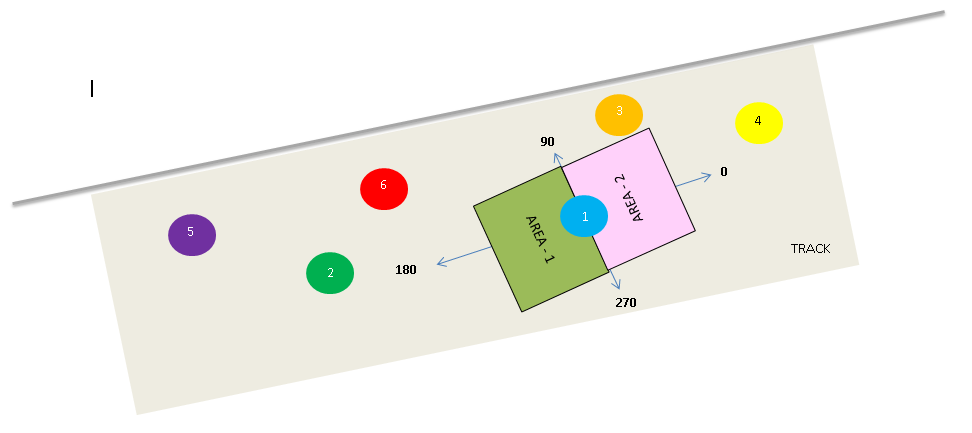

In [24]:
def road_taken(df,jockey_cordinants,per_furlong_pos_index):
    '''
    Calculates the distance each jockey takes between furlongs and returns a dict that calculates the angle of each jockey relative to the other jockeys.

    Parameters
    ----------
    df : Type DataFrame
        Selected race dataframe returning from select_race function.
    jockey_cordinants : TYPE dict
        Selected race  jockey coordinates ,dictionary returning from select_race function.
    per_furlong_pos_index : TYPE List
        urlong's index returning from cordinants_per_furlong functions.

    Returns
    -------
    jockey_dist_furlong: TYPE Dict.
        Distance traveled between furlongs.
        
    jockey_angle_furlong: TYPE Dict.
        The angle of each jockey relative to the other jockeys on furlongs.

    '''
    from math import radians, cos, sin, asin, sqrt,atan2,degrees
    import itertools
    
    def haversine(lon1, lat1, lon2, lat2):
        """
        Calculate the great circle distance in kilometers between two points 
        on the earth (specified in decimal degrees)
        """
        from math import radians, cos, sin, asin, sqrt

        # convert decimal degrees to radians 
        lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

        # haversine formula 
        dlon = lon2 - lon1 
        dlat = lat2 - lat1 
        a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
        c = 2 * asin(sqrt(a)) 
        r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
        return c * r
    def initial_bearing(pointA, pointB):
        """
        Parameters
        ----------
        pointA : TYPE Tuple.
            X,Y Cordinants.
        pointB : TYPE Tuple.
            X,Y Cordinants.

        Raises
        ------
        TypeError
            Parameters if not tuple.

        Returns
        -------
        compass_bearing : TYPE Float
            Returns the angle.


        """
        if (type(pointA) != tuple) or (type(pointB) != tuple):
            raise TypeError("Only tuples are supported as arguments")

        lat1 = radians(pointA[0])
        lat2 = radians(pointB[0])

        diffLong = radians(pointB[1] - pointA[1])

        x = sin(diffLong) * cos(lat2)
        y = cos(lat1) * sin(lat2) - (sin(lat1)
                * cos(lat2) * cos(diffLong))

        initial_bearing = atan2(x, y)

        # Now we have the initial bearing but math.atan2 return values
        # from -180° to + 180° which is not what we want for a compass bearing
        # The solution is to normalize the initial bearing as shown below
        initial_bearing = degrees(initial_bearing)
        compass_bearing = (initial_bearing + 360) % 360
        
        return compass_bearing
    
    jockey_dist_furlong={str(i): [] for i in per_furlong_pos_index}
    jockey_angle_furlong={str(i): {} for i in per_furlong_pos_index}
    
    for index in per_furlong_pos_index:
        ls=[]
        a_s=[]
        jockey_div=first.jockey.value_counts().index.to_list()
        for n,jockey_n in enumerate(df.jockey.value_counts().index):
            sum_dis=0
            
            
            for i in range(0,index):
                    x_f=jockey_cordinants[n]['latitude'].reset_index(drop=True).loc[i]
                    y_f=jockey_cordinants[n]['longitude'].reset_index(drop=True).loc[i]
                    x_s=jockey_cordinants[n]['latitude'].reset_index(drop=True).loc[i+1]
                    y_s=jockey_cordinants[n]['longitude'].reset_index(drop=True).loc[i+1]
                    #x_diff=x_f-x_s
                    #y_diff=y_f-y_s
                    sum_dis+=haversine(y_f,x_f,y_s,x_s)
            ls.append(sum_dis)
            x_f=jockey_cordinants[n]['latitude'].reset_index(drop=True).loc[index]
            y_f=jockey_cordinants[n]['longitude'].reset_index(drop=True).loc[index]
            
            
            for t,jockey_name in enumerate(jockey_div):
                x_s=jockey_cordinants[t]['latitude'].reset_index(drop=True).loc[index]
                y_s=jockey_cordinants[t]['longitude'].reset_index(drop=True).loc[index]
                pA=(x_f,y_f)
                pB=(x_s,y_s)
                angle=initial_bearing(pA,pB)
                a_s.append(angle)
            jockey_angle_furlong[str(index)][jockey_n]=a_s
            a_s=[]
        jockey_dist_furlong[str(index)]=ls
        
    return jockey_dist_furlong,jockey_angle_furlong

def placement(xmax_y,xmin_y,origin_x,origin_y,checkpoints_cordinant,per_furlong_pos_index,angle_dict):
    """
    Calculates the jockey rank in the furlongs.

    Parameters
    ----------
    xmax_y : TYPE float.
    xmin_y : TYPE float.
    origin_x : TYPE float.
    origin_y : TYPE float.
    checkpoints_cordinant : TYPE dict.
    per_furlong_pos_index : TYPE list.
    angle_dict : TYPE dict.

    Returns
    -------
    placement_val : TYPE dict.
        Jockey rank in the furlongs.

    """
    track=first[first['jockey']==first[first['latitude']==min(first['latitude'])]['jockey'].iloc[0]]['jockey'].iloc[0]
    track_index=list(checkpoints_cordinant.keys()).index(track)
    distance_dict={str(i) :[] for i in per_furlong_pos_index}
    for num,index in enumerate(checkpoints_cordinant[list(checkpoints_cordinant.keys())[0]].index):
        ls=[]
        
        for key in checkpoints_cordinant.keys():
            x=checkpoints_cordinant[key]['latitude'][index]
            y=checkpoints_cordinant[key]['longitude'][index]
            ls.append([x,y,key])
        distance_dict[str(per_furlong_pos_index[num])]=ls
        
    placement_val={str(i):['' for k in range(len(checkpoints_cordinant.keys()))] for i in distance_dict.keys()}
    value_name_area_ls={str(i):[] for i in distance_dict.keys()}    
    for key,value in distance_dict.items():
        for j in range(len(value)):
            if((origin_x>=value[j][0]) & (xmin_y<=value[j][1])): # 1 sector 
                value_name_area_ls[key].append([value[j][2],0])
            else:
                if((origin_x<value[j][0])&(xmax_y<value[j][1])):
                    value_name_area_ls[key].append([value[j][2],1])
                else:
                    if((origin_x<=value[j][0]) & (xmax_y>=value[j][1])):
                        value_name_area_ls[key].append([value[j][2],2])
                    else:
                        if((origin_x>value[j][0]) & (xmin_y>value[j][1])):
                            value_name_area_ls[key].append([value[j][2],3])
    area_1=list(set([key for key in value_name_area_ls.keys() if (value_name_area_ls[key][track_index][1]==0) | (value_name_area_ls[key][track_index][1]==1)]))
    area_1.sort()
    area_2=list(set([key for key in value_name_area_ls.keys() if (value_name_area_ls[key][track_index][1]==2) | (value_name_area_ls[key][track_index][1]==3)]))
    area_2.sort()
    for key,value in value_name_area_ls.items():
        dis_ls=[i[0] for i in value_name_area_ls[key]] # jockey name döndürüyor
        for area in area_1:
            ls=[]    
            for z in dis_ls:
                right=0
                left=0
                for i in jockey_angle_furlong[area][z]:
                    if ((i>0) & (i<=90)) | ((i>=270) & (i<360)):
                        right+=1
                    if ((i<=180) & (i>=90)) | ((i>=180) & (i<270)):
                        left+=1
                
                placement_val[area][right]=z
        for area in area_2:
            for z in dis_ls:
                right=0
                left=0
                for i in jockey_angle_furlong[area][z]:
                    if ((i>0) & (i<=92)) | ((i>=272) & (i<360)):
                        right+=1
                    if ((i<=180) & (i>92)) | ((i>=180) & (i<272)):
                        left+=1  
                placement_val[area][left]=z
    return placement_val



***In this section, you can see how each jockey is ranked relative to the other jockeys and how their angles are stored as a dictionary.***

In [25]:
first,jockey_cordinants=select_race(merged_df,'2019-01-01','AQU',1)
position_cordinants_per_furlong,furlongs_split,per_furlong_pos_index=cordinants_per_furlong(first,jockey_cordinants)
xmax_y,xmin_y,origin_x,origin_y=get_origin(first)
checkpoints_cordinant=checkpoints_location(first,jockey_cordinants,per_furlong_pos_index,type=1)

jockey_dist_furlong,jockey_angle_furlong=%time road_taken(first,jockey_cordinants,per_furlong_pos_index) 
jockey_angle_furlong

CPU times: user 1.53 s, sys: 292 µs, total: 1.53 s
Wall time: 1.53 s


{'0': {'Jomar Garcia': [0.0,
   132.97140688902294,
   27.868322397792724,
   122.8156126234976],
  'Manuel Franco': [312.97141392235915,
   0.0,
   9.372950959375373,
   117.38750075757474],
  'Junior Alvarado': [207.86833421463464,
   189.37295573163308,
   0.0,
   163.28271510347156],
  'Jose Lezcano': [302.815635601128,
   297.3875166954755,
   343.282726263245,
   0.0]},
 '49': {'Jomar Garcia': [0.0,
   20.36207989284935,
   27.858559602687706,
   58.657337098220694],
  'Manuel Franco': [200.36211102791523,
   0.0,
   151.2853531468454,
   189.37673615482305],
  'Junior Alvarado': [207.8585974588001,
   331.2853598650428,
   0.0,
   197.28083294351097],
  'Jose Lezcano': [238.65735631356586,
   9.376724233996356,
   17.28081430316587,
   0.0]},
 '98': {'Jomar Garcia': [0.0,
   19.095209356722933,
   26.36377110776732,
   41.79099949955804],
  'Manuel Franco': [199.0952421861255,
   0.0,
   129.5532884651343,
   183.90473911239764],
  'Junior Alvarado': [206.36381399228173,
   309.

In [26]:
plc=%time placement(xmax_y,xmin_y,origin_x,origin_y,checkpoints_cordinant,per_furlong_pos_index,jockey_angle_furlong) 
plc

CPU times: user 3.64 ms, sys: 98 µs, total: 3.74 ms
Wall time: 3.66 ms


{'0': ['Jose Lezcano', 'Manuel Franco', 'Jomar Garcia', 'Junior Alvarado'],
 '49': ['Manuel Franco', 'Junior Alvarado', 'Jose Lezcano', 'Jomar Garcia'],
 '98': ['Manuel Franco', 'Junior Alvarado', 'Jose Lezcano', 'Jomar Garcia'],
 '147': ['Junior Alvarado', 'Manuel Franco', 'Jose Lezcano', 'Jomar Garcia'],
 '196': ['Manuel Franco', 'Junior Alvarado', 'Jose Lezcano', 'Jomar Garcia'],
 '245': ['Jose Lezcano', 'Manuel Franco', 'Junior Alvarado', 'Jomar Garcia'],
 '315': ['Jose Lezcano', 'Jomar Garcia', 'Junior Alvarado', 'Manuel Franco']}

# Furlong Charts 

In [27]:
def make_sub(df,checkpoints_cordinant,jockey_dist_furlong,per_furlong_pos_index):
    fig = make_subplots(
        rows=4, cols=1,
        specs=[[{"type": "scatter"}],
               [{"type": "scatter"}],
               [{"rowspan": 2,"type": "table"}],
               [None]],
        subplot_titles=("Acceleration","Snapshot on Furlongs ","Jockey Position on Furlong "),)
    #Track plot
    fig.add_trace(go.Scatter(x=df[df['jockey']==df[df['latitude']==min(df['latitude'])]['jockey'].iloc[0]]['latitude'],
                             y=df[df['jockey']==df[df['latitude']==min(df['latitude'])]['jockey'].iloc[0]]['longitude'],
                             mode="lines",
                             showlegend = False,
                             name='Track',
                             line=dict(width=1.4, color="white")),
                 row=2,col=1)
    annotation_head=[i for i in range(1,len(per_furlong_pos_index))]
    annotation_head.insert(0,'Start')
    for num,val in enumerate(checkpoints_cordinant.keys()):
        fig.add_trace(go.Scatter(x=checkpoints_cordinant[val]['latitude'],
                                 y=checkpoints_cordinant[val]['longitude'],
                                mode="markers",

                                name=val,
                                marker=dict(size=7,color=colors[num])),row=2,col=1)
    for num,val in enumerate(per_furlong_pos_index):
        fig.add_annotation(x=checkpoints_cordinant[df[df['jockey']==df[df['latitude']==min(df['latitude'])]['jockey'].iloc[0]]['jockey'].iloc[0]].iloc[:,0].reset_index(drop=True)[num], 
                           y=checkpoints_cordinant[df[df['jockey']==df[df['latitude']==min(df['latitude'])]['jockey'].iloc[0]]['jockey'].iloc[0]].iloc[:,1].reset_index(drop=True)[num],
                text=str(annotation_head[num]),
                showarrow=False,
                yshift=25,row=2,col=1)
    fig.update_xaxes(showgrid=False, gridwidth=0.75, gridcolor='LightPink')
    fig.update_yaxes(showgrid=False, gridwidth=0.75, gridcolor='LightPink')
    #Acceleration plot
    acce_dict={str(i):[] for i in checkpoints_cordinant.keys()}

    next=0
    for num,val in enumerate(list(jockey_dist_furlong.keys())[1:],start=1):
        for n,name in enumerate(acce_dict.keys()):
            if num==1: 
                next=0
            else: 
                next=jockey_dist_furlong[list(jockey_dist_furlong.keys())[num-1]][n] 
            delta_x=jockey_dist_furlong[val][n]-next
            acce_dict[list(checkpoints_cordinant.keys())[n]].append(delta_x)

    acce_furlong=[i for i in range(len(list(checkpoints_cordinant.values())[0].index))]
    for n,key in enumerate(acce_dict.keys()):
        fig.add_trace(go.Scatter(x=acce_furlong,
                                     y=acce_dict[key],
                                    mode="lines",
                                    showlegend = False,

                                    name=key,
                                    line=dict(width=1.2, color=colors[n])),
                                    row=1,col=1)
    #Jockey Position for Furlongs Table 
    annotation_head.insert(0,'Rank')
    cells=list(plc.values())
    cells.insert(0,[i for i in range(1,len(plc.values())+1)])
    cells_v=[k[i] for i in range(len(cells[1])) for k in cells ]
    fig.add_trace(go.Table(
        header=dict(values=annotation_head,
                    fill_color='#232425',
                    font=dict(size=15,color='red'),
                    align='center'),
        cells=dict(values=cells,
                   fill_color='#232425',
                   font=dict(size=13,color='white'),
                   align='left')),row=3,col=1)
    fig['layout']['xaxis']['title']= 'Furlongs'
    fig['layout']['yaxis']['title']= 'Acceleration'
    fig['layout']['xaxis2']['title']='Latitude'
    fig['layout']['yaxis2']['title']='Longitude'
    fig['layout']['xaxis'].update(showgrid=True)
    
    fig.update_layout(title_text='<b>'+str(len(per_furlong_pos_index)-1)+' Furlong Checkpoint Jockey Position '+'</b>',
                                  height=1250,
                                  width=800,
                                  title_x=0.5,
                                  paper_bgcolor='#232425',
                                  plot_bgcolor='#232425',
                                  font=dict(
                                      family="Courier New, monospace",
                                      size=18,
                                      color='white'),
                                  legend=dict(yanchor="bottom",
                                                y=0.45,
                                                xanchor="right",
                                                x=1.5
                                            )
                                     )
    for i in fig['layout']['annotations']:
        i['font'] = dict(size=20,color='red')
    fig.add_annotation(dict(font=dict(color='yellow',size=12),
                                        x=-0.15,
                                        y=1.25,
                                        showarrow=False,
                                        text='Track: '+df['track_id'][0]+' | '+'Race Date: '+str(df['race_date'][0].date())+' | '+'Race Number:'+str(df['race_number'][0]),
                                        textangle=0,
                                        xanchor='left',
                                        xref="x domain",
                                        yref="y domain"
                                        ),row=1,col=1)    
    fig.show()


***During the race, acceleration and position ranking information graphics were drawn between the furlongs.***

In [28]:
first,jockey_cordinants=select_race(merged_df,'2019-01-01','AQU',1)
position_cordinants_per_furlong,furlongs_split,per_furlong_pos_index=cordinants_per_furlong(first,jockey_cordinants)
xmax_y,xmin_y,origin_x,origin_y=get_origin(first)
checkpoints_cordinant=checkpoints_location(first,jockey_cordinants,per_furlong_pos_index,type=1)

jockey_dist_furlong,jockey_angle_furlong=%time road_taken(first,jockey_cordinants,per_furlong_pos_index) 
plc=%time placement(xmax_y,xmin_y,origin_x,origin_y,checkpoints_cordinant,per_furlong_pos_index,jockey_angle_furlong) 
make_sub(first,checkpoints_cordinant,jockey_dist_furlong,per_furlong_pos_index)

CPU times: user 1.51 s, sys: 3.84 ms, total: 1.52 s
Wall time: 1.51 s
CPU times: user 3.21 ms, sys: 868 µs, total: 4.08 ms
Wall time: 3.88 ms


In [29]:
first,jockey_cordinants=select_race(merged_df,'2019-01-04','AQU',4)
position_cordinants_per_furlong,furlongs_split,per_furlong_pos_index=cordinants_per_furlong(first,jockey_cordinants)
xmax_y,xmin_y,origin_x,origin_y=get_origin(first)
checkpoints_cordinant=checkpoints_location(first,jockey_cordinants,per_furlong_pos_index,type=1)

jockey_dist_furlong,jockey_angle_furlong=%time road_taken(first,jockey_cordinants,per_furlong_pos_index) 
plc=%time placement(xmax_y,xmin_y,origin_x,origin_y,checkpoints_cordinant,per_furlong_pos_index,jockey_angle_furlong) 
make_sub(first,checkpoints_cordinant,jockey_dist_furlong,per_furlong_pos_index)

CPU times: user 3.73 s, sys: 20.1 ms, total: 3.75 s
Wall time: 3.74 s
CPU times: user 6.56 ms, sys: 0 ns, total: 6.56 ms
Wall time: 6.31 ms


# All Jokey Furlong Rank Heatmap

* ***The sequences in the furlongs were converted into a DataFrame and output as .csv. This output was then displayed as a furlong heatmap for each jockey.***

In [30]:
"""above_350=start_race['jockey'].value_counts()[start_race['jockey'].value_counts()>350].index.to_list()
selected_df=pd.DataFrame()
for i in above_350:
    a=start_race[start_race['jockey']==i]
    selected_df=selected_df.append(a,ignore_index=True)
unique_race=selected_df.sort_values(['track_id','race_date']).set_index(['race_date','track_id','race_number']).index.unique()
furlong_df=pd.DataFrame()
for race in unique_race:
    print(race)
    first,jockey_cordinants=select_race(merged_df,str(race[0]),race[1],race[2])
    position_cordinants_per_furlong,furlongs_split,per_furlong_pos_index=cordinants_per_furlong(first,jockey_cordinants)
    xmax_y,xmin_y,origin_x,origin_y=get_origin(first)
    checkpoints_cordinant=checkpoints_location(first,jockey_cordinants,per_furlong_pos_index,1)
    jockey_dist_furlong,jockey_angle_furlong=%time road_taken(first,jockey_cordinants,per_furlong_pos_index) 
    plc=%time placement(xmax_y,xmin_y,origin_x,origin_y,checkpoints_cordinant,per_furlong_pos_index,jockey_angle_furlong)
    dta=[]
    column=[['race_date','track_id','race_number','furlong']+['pos_'+str(i) for i in range(1,max_jockey_count+1)]]
    for n,i in enumerate(plc.keys()):
        dta.append([race[0],race[1],race[2],furlongs_split[n]]+list(plc[i]))
    r_df=pd.DataFrame(data=dta)
    furlong_df=pd.concat([furlong_df,r_df],axis=0,ignore_index=True)
    furlong_df.to_csv('furlong_df.csv', index=False)"""

"above_350=start_race['jockey'].value_counts()[start_race['jockey'].value_counts()>350].index.to_list()\nselected_df=pd.DataFrame()\nfor i in above_350:\n    a=start_race[start_race['jockey']==i]\n    selected_df=selected_df.append(a,ignore_index=True)\nunique_race=selected_df.sort_values(['track_id','race_date']).set_index(['race_date','track_id','race_number']).index.unique()\nfurlong_df=pd.DataFrame()\nfor race in unique_race:\n    print(race)\n    first,jockey_cordinants=select_race(merged_df,str(race[0]),race[1],race[2])\n    position_cordinants_per_furlong,furlongs_split,per_furlong_pos_index=cordinants_per_furlong(first,jockey_cordinants)\n    xmax_y,xmin_y,origin_x,origin_y=get_origin(first)\n    checkpoints_cordinant=checkpoints_location(first,jockey_cordinants,per_furlong_pos_index,1)\n    jockey_dist_furlong,jockey_angle_furlong=%time road_taken(first,jockey_cordinants,per_furlong_pos_index) \n    plc=%time placement(xmax_y,xmin_y,origin_x,origin_y,checkpoints_cordinant,per_

***Import Output Data Furlong***

In [31]:
furlong_df=pd.read_csv('../input/furlongdf/furlong_df (1).csv')
furlong_df['3'].replace('Start','0',inplace=True)
furlong_df['3']=furlong_df['3'].astype(int)

In [32]:

max_jockey_count=start_race.groupby(['race_date','track_id','race_number'])['jockey'].count().max()
col_name=['race_date','track_id','race_number','Furlongs']+['pos_'+str(i) for i in range(1,max_jockey_count+1)]
furlong_df.columns=col_name
furlong_df.head(10)


race_date track_id  race_number  Furlongs               pos_1  \
0  2019-01-01      AQU            1         0        Jose Lezcano   
1  2019-01-01      AQU            1         1       Manuel Franco   
2  2019-01-01      AQU            1         2       Manuel Franco   
3  2019-01-01      AQU            1         3     Junior Alvarado   
4  2019-01-01      AQU            1         4       Manuel Franco   
5  2019-01-01      AQU            1         5        Jose Lezcano   
6  2019-01-01      AQU            1         6        Jose Lezcano   
7  2019-01-01      AQU            3         0        Jose Lezcano   
8  2019-01-01      AQU            3         1     Junior Alvarado   
9  2019-01-01      AQU            3         2  Benjamin Hernandez   

                pos_2            pos_3                    pos_4  \
0       Manuel Franco     Jomar Garcia          Junior Alvarado   
1     Junior Alvarado     Jose Lezcano             Jomar Garcia   
2     Junior Alvarado     Jose Lezcano             Jomar Garcia   
3       Manuel Franco     Jose Lezcano             Jomar Garcia   
4     Junior Alvarado     Jose Lezcano             Jomar Garcia   
5       Manuel Franco  Junior Alvarado             Jomar Garcia   
6        Jomar Garcia  Junior Alvarado            Manuel Franco   
7        Rajiv Maragh  Junior Alvarado            Manuel Franco   
8  Benjamin Hernandez    Manuel Franco             Rajiv Maragh   
9     Junior Alvarado    Manuel Franco  Andre Shivnarine Worrie   

                     pos_5                    pos_6               pos_7  \
0                      NaN                      NaN                 NaN   
1                      NaN                      NaN                 NaN   
2                      NaN                      NaN                 NaN   
3                      NaN                      NaN                 NaN   
4                      NaN                      NaN                 NaN   
5                      NaN                      NaN                 NaN   
6                      NaN                      NaN                 NaN   
7          Reylu Gutierrez  Andre Shivnarine Worrie  Benjamin Hernandez   
8  Andre Shivnarine Worrie             Jose Lezcano     Reylu Gutierrez   
9             Rajiv Maragh             Jose Lezcano         Eric Cancel   

             pos_8 pos_9 pos_10 pos_11 pos_12 pos_13 pos_14  
0              NaN   NaN    NaN    NaN    NaN    NaN    NaN  
1              NaN   NaN    NaN    NaN    NaN    NaN    NaN  
2              NaN   NaN    NaN    NaN    NaN    NaN    NaN  
3              NaN   NaN    NaN    NaN    NaN    NaN    NaN  
4              NaN   NaN    NaN    NaN    NaN    NaN    NaN  
5              NaN   NaN    NaN    NaN    NaN    NaN    NaN  
6              NaN   NaN    NaN    NaN    NaN    NaN    NaN  
7      Eric Cancel   NaN    NaN    NaN    NaN    NaN    NaN  
8      Eric Cancel   NaN    NaN    NaN    NaN    NaN    NaN  
9  Reylu Gutierrez   NaN    NaN    NaN    NaN    NaN    NaN

In [33]:
def jockey_df_list(furlongs,start_race):
    """
    Position information of each jockey is transferred as heatmap.
    
    Parameters
    ----------
    furlongs : TYPE DataFrame
        Furlong position each jockey.
    start_race : TYPE DataFrame

    Returns
    -------
    fig : TYPE Object
        Heatmap Listed each jockey on the Plotly API.

    """
    fig=go.Figure()
    buttons=[]
    furlongs.set_index('Furlongs',inplace=True)
    unique_jockey_list=start_race['jockey'].unique()
    max_jockey_count=start_race.groupby(['race_date','track_id','race_number'])['jockey'].count().max()
    for n,k in enumerate(unique_jockey_list):
        df=furlongs[furlongs[['pos_'+str(i) for i in range(1,max_jockey_count+1)]]==k][['pos_'+str(i) for i in range(1,max_jockey_count+1)]]
        df=df.groupby('Furlongs').count()
        fig.add_trace(go.Heatmap(y=df.index,x=df.columns,z=df[['pos_'+str(i) for i in range(1,max_jockey_count+1)]],name=k,
                    hovertemplate ='<i>Rank</i>: %{x}'+'<br><b>Furlong</b>: %{y}<br>'+'<i>Count</i>: %{z}',text=df[['pos_'+str(i) for i in range(1,max_jockey_count+1)]],
                    texttemplate="%{text}",textfont={"size":14}))
    return fig
fig=jockey_df_list(furlong_df,start_race)
fig['data']
fig.update_layout(title_text='<b>'+' What is the rank of the jockey in the furlongs at all Race?'+'</b>',
                                  title_font=dict(color='#AD2B10'),
                                  xaxis_title="Ranking of jockeys in Furlong",
                                  yaxis_title="Furlongs",
                                  legend_title="Count",
                                  height=1000,
                                  title_x=0.5,
                                  showlegend=False,
                                  paper_bgcolor='#232425',
                                  plot_bgcolor='#232425',
                                  font=dict(
                                      family="Courier New, monospace",
                                      size=15,
                                      color='white'),
                                  
                  updatemenus=[
                                {
                                    "buttons": [
                                        {
                                            "label": m,
                                            "method": "update",
                                            "args": [
                                                {
                                                    "visible": [
                                                        
                                                        True if t.name==m else False for t in fig.data
                                                    ]
                                                }
                                                
                                            ],
                                            
                                        }
                                        for m in start_race['jockey'].unique().tolist()
                                    ],
                                    'font' : dict(color='LightPink'),
                                    'pad':{"l": 0, "r": 20, "t":25 , "b": 0}
                                }
                            ],
                  
                  
                                     )

fig.show()

# Conculusion

* Having horse IDs can give much better analysis results.
* With deeper features, the angle taken by the horse in the tracus indices, the pulse information of the horse in the furlongs, injury analysis can be made, especially in the turning parts.
* With the finish line being the coordinate information, it will be possible to know the acceleration of the horse and the exact time the horse has finished the track. In this way, it can be determined whether the characteristic features of the track are in a causal relationship with respect to the horses.
* For example, it is a fact that not every horse can run in very long races. These are made in rare races and with highly experienced horses.

***It was a very enjoyable dataset. Thanks for your time...***